# Phase features


## Most Relevant Phase Features

### Instantaneous Phase of a Signal: In-Depth Explanation

Given a particular signal generator in a particular environment, one can obtain its frequency stability with the measures presented below, but one should not then expect an accurate prediction of frequency stability in a new environment.

Actually the utility of statistics is in the formation of idealized models that reasonably describe significant observables of real systems. One may, for example, consider a hypothetical ensemble of noises with certain properties (such as stationarity) as a model for a particular real device. If a model is to be acceptable, it should have at least two properties: 
- first, the model should be tractable; that is, one should be able to easily arrive at estimates for the elements of the models.
- second, the model should be consistent with observables derived from the real device that it is simulating.
 

The instantaneous phase of a signal is the value of the phase angle at any given moment in time. In many RF and signal processing applications, we represent a real signal using its complex (or analytic) representation, which allows us to capture both the magnitude (or envelope) and the phase information. Here’s an in-depth explanation:

#### 1. Mathematical Definition

Given a signal represented in its complex form as:

$$
s(t) = A(t) \, e^{j\phi(t)},
$$

where:

- **$A(t)$** is the instantaneous amplitude or envelope.
- **$\phi(t)$** is the instantaneous phase, that is, the angle (in radians) of the signal at time $t$.

If you have an in-phase component $I(t)$ and a quadrature component $Q(t)$, the signal can be written as:

$$
s(t) = I(t) + jQ(t).
$$

In this case, the instantaneous phase is computed by taking the arctangent of the ratio of the quadrature component to the in-phase component:

$$
\phi(t) = \operatorname{atan2}(Q(t), I(t)).
$$

The `atan2` function is used instead of the simple arctan to correctly map the angle into the full range $(-\pi, \pi]$.

#### 2. Physical Interpretation

##### Instantaneous Nature

The term “instantaneous” emphasizes that the phase value is defined for each point in time rather than being an average or an overall phase offset. The instantaneous phase provides a fine-grained view of the signal’s behavior.

##### Time-Varying Behavior

For an ideal pure sinusoid, the phase increases linearly with time:

$$
\phi(t) = \omega_c t + \phi_0,
$$

where $\omega_c$ is the carrier angular frequency and $\phi_0$ is the initial phase. In real-world oscillators, however, the phase is subject to noise and other imperfections. This means the actual instantaneous phase is:

$$
\phi(t) = \omega_c t + \phi_0 + \Delta\phi(t),
$$

where $\Delta\phi(t)$ represents the random fluctuations or noise (phase noise).

##### Jitter

The deviations $\Delta\phi(t)$ can cause timing uncertainty (jitter) in the time domain. In digital communications, these fluctuations can degrade performance by causing errors in symbol timing or demodulation.

#### 3. Why It Matters

Understanding and accurately measuring the instantaneous phase is critical in:

- **RF Fingerprinting:**  
  Minor differences in the phase noise profiles of different oscillators can act as unique device signatures.

- **Signal Demodulation and Synchronization:**  
  Correctly recovering phase information is essential for demodulating phase-sensitive modulations such as QAM or PSK.

- **Time-Frequency Analysis:**  
  Instantaneous phase analysis leads to insights in frequency modulation, jitter analysis, and overall signal stability.

#### 4. Practical Considerations

##### Phase Unwrapping

When computing the instantaneous phase, the output of `atan2` is usually limited to an interval such as $(-\pi, \pi]$. To follow the true evolution of the phase, techniques called “phase unwrapping” are applied to remove discontinuities.

##### Filtering and Detrending

Especially in noisy environments, it may be necessary to detrend or filter the phase signal to separate the systematic (e.g., the linear trend of the carrier) from the random fluctuations (the phase noise).




### A. Phase Noise:
Phase noise represents the short-term fluctuations of the instantaneous phase of an oscillator signal. In an ideal oscillator, the output signal is a perfect sinusoid; however, real-world oscillators suffer from phase fluctuations due to thermal noise, flicker noise (1/f noise), and other imperfections in the circuitry. These fluctuations appear in the frequency domain as skirts or spread-around of the nominal carrier frequency and are usually quantified in units of dBc/Hz (decibels relative to the carrier per Hertz).

The key phenomena of phase noise encompass instantaneous phase fluctuations (jitter), spectral broadening, and distinct noise behaviors (white, flicker, and brown). 

- **Relevance**: The random fluctuations in the phase of the oscillator cause distinctive smearing or rotation of the constellation points.
- **Why**: The statistical properties (variance, distribution) of phase noise are closely tied to the quality and design of the oscillator, offering a robust, device-specific signature.

Key phenomena related to phase noise include:

1. #### Jitter: 

The time-domain manifestation of phase noise can be seen as jitter, which is the timing uncertainty of zero-crossings in the sinusoidal signal. 
Jitter quantifies the uncertainty in the signal timing and is directly related to the phase fluctuations. Small deviations in phase translate into timing errors that affect system performance. 

It is common to express the root-mean-square (RMS) jitter in seconds using the relationship between phase error (in degrees or radians) and the carrier frequency.

The relationship between the instantaneous phase error (jitter) and the phase noise PSD is given by integrating the PSD over the frequency band of interest. For example, when no significant 1/f noise is present, the cycle jitter σc  can be related to the phase noise at an offset frequency f by:

$$
\sigma_{c}^{2} = \frac{f^2 L(f)}{f_{\text{osc}}^{3}}
$$

where $f_{\text{osc}}$ is the oscillator frequency.



2. #### Spectral Broadening (Sidebands):
The energy that would ideally be concentrated at a single frequency becomes spread over adjacent frequency bins.

In the frequency domain, ideally all signal power is concentrated at the carrier frequency, represented by a Dirac delta function. Phase noise, however, causes this energy to spread around the nominal frequency. This spreading is observed as skirts or sidebands in the power spectral density (PSD) of the oscillator output. The skirts represent the phase noise power that is offset from the carrier.
The concept is typically quantified with the single-sideband noise spectral density L(f) expressed in dBc/Hz (decibels relative to the carrier per Hertz).

The phase noise is defined as:

$$
L(f) = 10 \log_{10}\left(S_{\phi}(f)/2\right) \quad [\text{dBc/Hz}]
$$

where

$$
S_{\phi}(f)
$$

is the **single-sided power spectral density (PSD) of phase fluctuations** (in $\text{rad}^2/\text{Hz}$).

For many oscillators under Leeson’s model, the phase noise may exhibit distinct regions:

- **White Noise Region:**  
  Exhibits flat behavior, meaning $\propto f^{0}$ at higher offsets.

  This is caused by thermal noise sources and is characterized by a flat (constant) power spectral density. In the frequency domain, white phase noise gives a PSD proportional to 
$f^{0}$  (i.e. independent of the offset frequency) when far enough from the carrier.
In time, integrating white noise (which is Gaussian) leads to a random walk of the phase.

  - **Meaning**: The notation $f^{0}$ means that the PSD is constant with respect to frequency. In other words, the noise power is the same across all offset frequencies.

  - **Implication**: For white phase noise, the spectral density does not change as you move away from the carrier—it is flat. This type of noise is typically generated by ***thermal processes*** and is independent of frequency.

- **Flicker Noise Region:**  
  Approximately behaves as $\propto f^{-1}$ at low offset frequencies.

  - **Meaning**: The expression $1/𝑓$ indicates that the PSD decreases inversely with frequency. As the offset frequency increases, the noise power declines proportionally to $1/f$ .

  - **Implication**: Flicker noise (or $1/f$ noise) is significant at frequencies very close to the carrier. This means that near the carrier the noise power is high, but it diminishes as you move further away. Flicker noise is often attributed to defects or instabilities in materials and components.


- **Brownian noise:**  
  In some cases, additional slopes can be observed (for example, $\propto f^{-2}$ for Brownian noise).

  - **Meaning**: The notation $f^{-2}$ indicates that the PSD decreases with the square of the offset frequency. As you move away from the carrier, the noise power falls off much faster—inversely proportional to the square of 𝑓.

  - **Implication**: Brown noise (often called random walk noise) means that the phase fluctuations accumulate more aggressively, and the resulting PSD rolls off sharply with increasing 𝑓. This steep decline is characteristic of noise processes with a "memory," such as integrated white noise, which leads to a random walk in phase.



3. #### Device Imperfections: 
Phase noise is largely determined by inherent hardware parameters (e.g., transistor noise, oscillator design, crystal imperfections) and offers a unique signature for each device—often exploited in RF fingerprinting and authentication.


### B.  Common Models for Representing Phase Noise as a Random Process : 
An oscillator ideally produces a signal 
$$
A·cos(ω₍c₎t), 
$$
but real oscillators exhibit random phase fluctuations:
$$
s(t) = A·cos(ω₍c₎t + φ(t)),
$$
where φ(t) is a random process—often modeled as a Wiener process 
$$
(i.e. φ(t) ~ N(0,σ²t))
$$
In complex baseband, this is written as:
$$
s(t) = A·e^(j[ω₍c₎t + φ(t)]).
$$
- Explanation: The phase noise leads to a time-varying rotation or “smearing” of the IQ constellation. The statistical properties (variance σ²) of φ(t) help characterize the oscillator’s quality, making it a distinctive feature.

Different models offer varied trade-offs between simplicity and fidelity to real-world behavior:

1.  **Wiener Process:**  
  Ideal for capturing the unbounded phase accumulation in a free-running oscillator but does not account for colored noise.

2. **Ornstein–Uhlenbeck Process:**  
  Provides a stationary, bounded model suitable for locked oscillators but may not reflect true free-running dynamics.

3. **Fractional Brownian Motion:**  
  Powerful when phase noise exhibits long-memory effects, but comes with higher mathematical and computational complexity.

4. **Composite Models:**  
  Combine multiple noise processes for a comprehensive view of phase noise behavior, at the expense of detailed parameter estimation.


#### 1. **Wiener Process Explanation:**  
A common approach is to model $\phi(t)$ as a stochastic process. One frequently used model is a Wiener process (or random walk):

$$
\phi(t) \sim N(0, \sigma^2 t)
$$


The Wiener process is an integration of white Gaussian noise over time. This means that the variance of $\phi(t)$ increases linearly with time:

$$
\text{Var}[\phi(t)] = \sigma^2 t
$$

In such a model, the phase noise is nonstationary since its variance is time-dependent, but over short intervals it is often locally approximated as stationary.

In other words:

The Wiener process is one of the simplest models. In this model, the instantaneous phase $\phi(t)$ is given by the time integration of white Gaussian noise $\eta(t)$:

$$
\phi(t) = \int_{0}^{t} \eta(\tau) \, d\tau,
$$

where $\eta(t)$ is assumed to be zero-mean white Gaussian noise with

$$
\langle \eta(t)\,\eta(t') \rangle = \sigma^2 \, \delta(t - t').
$$

As a result, the variance of the phase error grows linearly with time:

$$
\operatorname{Var}[\phi(t)] = \sigma^2 \, t.
$$

##### Advantages

- **Simplicity:** Easy to implement and understand.
- **Analytical Tractability:** Many properties can be derived in closed form.
- **Suitable for Free-Running Oscillators:** Models the accumulation of phase error due to thermal noise.

##### Disadvantages

- **Nonstationarity:** The variance grows without bound over time, which may not represent the behavior of practical oscillators over longer durations.
- **Does Not Capture Flicker Noise:** It does not inherently model the $1/f$ (flicker) behavior seen at close-in offsets.

#### 2. Ornstein–Uhlenbeck (OU) Process Model

##### Mathematical Model

The Ornstein–Uhlenbeck process introduces a mean-reverting property to the phase noise. Its stochastic differential equation is:

$$
d\phi(t) = -\lambda \, \phi(t) \, dt + \sigma \, dW(t),
$$

where:

- $\lambda > 0$ is the rate of mean reversion,
- $\sigma$ is the diffusion coefficient,
- $dW(t)$ is the increment of a Wiener process.

The OU process is stationary with a finite variance given by:

$$
\operatorname{Var}[\phi(t)] = \frac{\sigma^2}{2 \lambda}.
$$

##### Advantages

- **Stationarity:** The variance does not grow unbounded, which is useful for systems with feedback (e.g., phase-locked loops).
- **Mean-Reversion:** Models scenarios where the oscillator is actively corrected to follow a reference.

##### Disadvantages

- **May Not Reflect Free-Running Behavior:** Free-running oscillators typically show a random-walk (Wiener) behavior rather than mean-reversion.
- **Parameter Sensitivity:** The choice of $\lambda$ must reflect the physical system; if chosen inappropriately, the model may either over-suppress or under-represent the noise dynamics.

---

#### 3. Fractional Brownian Motion (fBm) Model

##### Mathematical Model

Fractional Brownian motion is a generalization of standard Brownian motion characterized by the Hurst exponent $H$ (with $0 < H < 1$). In this model, the phase increments are not independent but exhibit long-range correlations:

$$
\phi(t) \sim \operatorname{fBm}(H),
$$

with the covariance between increments given by

$$
\operatorname{Cov}\left(\phi(t), \phi(s)\right) = \frac{\sigma^2}{2} \left(t^{2H} + s^{2H} - |t - s|^{2H}\right).
$$

For $H=0.5$, the fBm reduces to the Wiener process, while other values of $H$ model “memory” effects in the phase noise.

##### Advantages

- **Captures Memory Effects:** Useful when phase noise exhibits long-range dependencies (flicker noise behavior).
- **Flexibility:** Adjusting $H$ allows modeling of different noise slopes (i.e., $1/f^\alpha$ behavior, where $\alpha = 2-2H$).

##### Disadvantages

- **Complexity:** Mathematical and computational implementation is more involved.
- **Parameter Estimation:** Determining the Hurst exponent and related parameters from measurements can be challenging.

#### 4. Composite or Multi-Component Models

##### Mathematical Model

In practice, the phase noise of an oscillator can be a combination of several noise types. A composite model for the phase noise power spectral density (PSD) might be expressed as:

$$
S_{\phi}(f) = S_{\phi,\text{white}}(f) + S_{\phi,\text{flicker}}(f) + S_{\phi,\text{brown}}(f),
$$

with typical dependencies:

- **White Noise:**  
  $S_{\phi,\text{white}}(f) \propto \text{constant}$.

- **Flicker Noise:**  
  $S_{\phi,\text{flicker}}(f) \propto \frac{1}{f}$.

- **Brown (Random Walk) Noise:**  
  $S_{\phi,\text{brown}}(f) \propto \frac{1}{f^2}$.

#####  **Power Spectral Density (PSD) Description**

The PSD of the phase fluctuations, $S_{\phi}(f)$, characterizes how the phase noise power is distributed over frequency. Depending on the dominant noise processes:

- **White Phase Noise:**  
  $S_{\phi}(f)$ is constant, and the integrated phase error over a 1 Hz bandwidth is directly related to the RMS jitter.

- **Flicker Noise:**  
  $S_{\phi}(f) \propto \frac{1}{f}$, meaning that lower offset frequencies contribute more significantly to phase variance.

The single-sideband phase noise metric, $L(f)$, is defined as:

$$
L(f) = 10 \log_{10}\left(S_{\phi}(f)/2\right)
$$

This quantifies the noise floor relative to the carrier in dBc/Hz.

##### Advantages

- **Realistic Representation:** Better reflects the observed behavior of oscillators across different offset frequency ranges.
- **Flexibility:** Each term can be weighted and modeled separately to fit empirical data.

##### Disadvantages

- **Model Complexity:** Requires careful parameter estimation to separate and quantify the contributions from various noise sources.
- **Computational Load:** Simulation and analysis may become more resource-intensive.


#### 5. Summary Comparison Table

| **Model**                | **Mathematical Representation**                                                                                                                                   | **Advantages**                                       | **Disadvantages**                                                      |
|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------------|
| **Wiener Process**       | $\phi(t)=\int_{0}^{t}\eta(\tau)\,d\tau$ <br> $\operatorname{Var}[\phi(t)]=\sigma^2\,t$                                                                                | Simple, analytical, suits free-running oscillators   | Nonstationary, unbounded variance, no flicker noise                    |
| **Ornstein–Uhlenbeck**   | $d\phi(t)=-\lambda\phi(t)\,dt+\sigma\,dW(t)$ <br> $\operatorname{Var}[\phi(t)]=\frac{\sigma^2}{2\lambda}$                                                          | Stationary, mean-reverting, bounded variance         | May not reflect free-running behavior, parameter sensitivity           |
| **Fractional Brownian Motion** | $\phi(t)\sim \operatorname{fBm}(H)$ <br> $\operatorname{Cov}\left(\phi(t),\phi(s)\right)=\frac{\sigma^2}{2}\left(t^{2H}+s^{2H}-|t-s|^{2H}\right)$  | Captures memory effects, flexible noise slope modeling | Complex implementation, challenging parameter estimation              |
| **Composite Models**     | $S_{\phi}(f)=S_{\phi,\text{white}}(f)+S_{\phi,\text{flicker}}(f)+S_{\phi,\text{brown}}(f)$                                                                         | Realistic over a broad frequency range               | Increased complexity and need for fitting multiple parameters          |



#### 7 **Leeson’s Equation**

Leeson’s equation is one of the classical formulations for phase noise in oscillators. It relates the device’s physical parameters to the expected phase noise PSD:

$$
L(f) = 10 \log_{10} \left[\frac{FkT}{2P} \left(1+\left(\frac{f_c}{2Qf}\right)^2\right)\left(1+\frac{f}{f_L}\right) \right]
$$

**Where:**

- $F$ is the noise factor of the oscillator,
- $k$ is Boltzmann’s constant,
- $T$ is the absolute temperature,
- $P$ is the power of the carrier signal,
- $Q$ is the quality factor of the oscillator’s resonant circuit,
- $f_c$ is the carrier frequency,
- $f$ is the offset from the carrier,
- $f_L$ is the flicker noise corner frequency.

**Interpretation:**

- **Thermal Noise Contribution:**  
  The term $\frac{FkT}{2P}$ describes the contribution from thermal noise.

- **Quality Factor Filtering Effect:**  
  The term $\left(1+\left(\frac{f_c}{2Qf}\right)^2\right)$ reflects the filtering effect due to the oscillator’s quality factor.

- **Flicker Noise Impact:**  
  The term $\left(1+\frac{f}{f_L}\right)$ captures the additional impact of flicker noise as the offset frequency decreases.

Leeson’s equation shows that phase noise increases (worse performance) at lower offset frequencies and is strongly influenced by both the oscillator’s design (via $Q$) and its operating conditions (via $P$, $T$, and $F$).









#### Device-Specific Signature:
The statistical properties of ϕ(t) (e.g., its variance σ2) vary from device to device. Even small differences in oscillator design or component quality lead to a unique phase noise profile that can be used as a fingerprint

# Libraries

In [2]:
import numpy as np
from analysis_functions import *


2025-04-28 09:33:00.216823: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 09:33:00.456618: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 09:33:00.640030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-28 09:33:00.861763: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-28 09:33:00.923187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 09:33:03.407163: W tensorflow/compiler/tf2tensorrt/utils/p

# Load Signal

In [3]:

data_dir = "../../data/"

sufix = 10
sample = 60  #0 - 9999
fs = 25e6  #sample_frequency
dt = 1/25e6 #period

samples = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
iq_signal = samples[sample,:,]
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]


print('Done')

Done


In [4]:
iq_signal = samples[sample,:,]
print(iq_signal[:,].shape)
print(i_signal.shape)

(11000, 2)
(11000,)


# Phase Noise 

Phase Noise Variance: 1.9417601


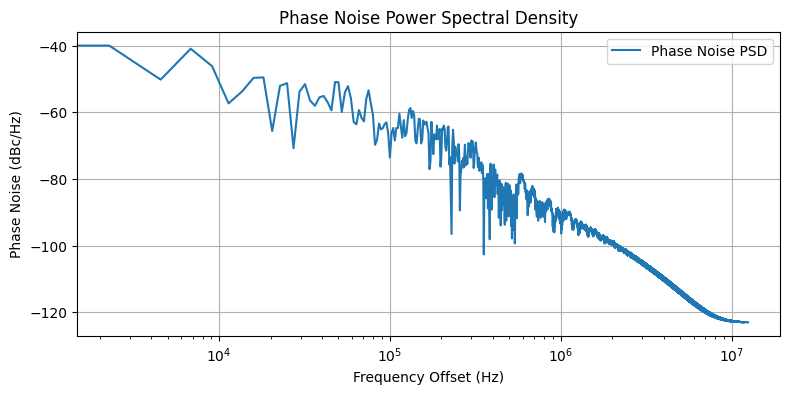

In [5]:
import numpy as np
from scipy.signal import welch, detrend
import matplotlib.pyplot as plt

def compute_phase_noise_features(iq_signal, fs):
    """
    Compute phase noise features from an IQ signal.
    
    Parameters:
      iq_signal : np.ndarray
          Array of shape (N, 2) where iq_signal[:, 0] is the I-component
          and iq_signal[:, 1] is the Q-component.
      fs : float
          Sample frequency in Hz.
    
    Returns:
      phase_noise_variance : float
          Variance of the detrended instantaneous phase (a scalar feature).
      f : np.ndarray
          Frequency bins (offset frequencies) for the PSD.
      phase_noise_dBc : np.ndarray
          Phase noise PSD values in dBc/Hz.
    """
    # Extract I and Q channels
    I = iq_signal[:, 0]
    Q = iq_signal[:, 1]
    
    # Compute the instantaneous phase (in radians)
    phase = np.angle(I + 1j * Q)
    #plt.figure(figsize=(8, 4))
    #plt.plot(phase, label="Phase detrended")
    #plt.show()
    
    # Unwrap phase to remove discontinuities at ±π
    phase_unwrapped = np.unwrap(phase)

    #plt.figure(figsize=(8, 4))
    #plt.plot(phase_unwrapped, label="Phase detrended")
    #plt.show()
    
    # Remove linear trend (e.g., due to a constant carrier frequency offset)
    phase_detrended = detrend(phase_unwrapped)


    #plt.figure(figsize=(8, 4))
    #plt.plot(phase_detrended, label="Phase detrended")
    #plt.show()
    

    # Compute a scalar feature: the variance of the phase noise (related to phase jitter)
    phase_noise_variance = np.var(phase_detrended)
    
    # Compute the power spectral density (PSD) of the phase noise using Welch's method
    # Adjust 'nperseg' as needed based on the signal length
    f, Pxx = welch(phase_detrended, fs, nperseg=len(phase_detrended))
    
    # Convert the PSD to dBc/Hz.
    # (Note: The factor of 2 in the conversion depends on convention; here we assume the carrier is normalized.)
    # Adding a small epsilon avoids log(0).
    epsilon = 1e-12
    phase_noise_dBc = 10 * np.log10((Pxx + epsilon)/2)
    
    return phase_noise_variance, f, phase_noise_dBc

# Example usage:
if __name__ == '__main__':
    fs = 25e6  # Sample frequency: 25 MHz
    N = 11000  # Total number of samples
    t = np.arange(N) / fs

    # For demonstration, create a carrier with frequency fc and add some phase noise.
    fc = 1e6  # 1 MHz carrier frequency (example)
    clean_phase = 2 * np.pi * fc * t

    # Generate random phase noise (white Gaussian noise in radians)
    noise_std = 0.1  # Standard deviation of phase noise (radians)
    phase_noise = np.random.normal(0, noise_std, size=t.shape)

    # Total instantaneous phase = carrier + phase noise
    noisy_phase = clean_phase + phase_noise

    # Create the IQ signal (assuming ideal amplitude)
    #I_signal = np.cos(noisy_phase)
    #Q_signal = np.sin(noisy_phase)
    #I_signal = np.cos(clean_phase)
    #Q_signal = np.sin(clean_phase)
    I_signal = i_signal
    Q_signal = q_signal
    iq_signal = np.column_stack((I_signal, Q_signal))

    # Compute phase noise features
    pn_variance, f_bins, pn_psd_dBc = compute_phase_noise_features(iq_signal, fs)
    print("Phase Noise Variance:", pn_variance)

    # Plot the phase noise PSD
    plt.figure(figsize=(8, 4))
    plt.plot(f_bins, pn_psd_dBc, label="Phase Noise PSD")
    plt.xlabel("Frequency Offset (Hz)")
    plt.ylabel("Phase Noise (dBc/Hz)")
    plt.title("Phase Noise Power Spectral Density")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.semilogx() 
    #plt.xlim(left=1e0)
    #plt.xscale('symlog', linthreshx=1) 
    plt.show()


Test 1: No phase noise - Variance: 2.40061988705309e-23
Test 2: Moderate phase noise (std=0.1) - Variance: 0.010007540899249648
Test 3: High phase noise (std=0.5) - Variance: 0.2501885224812628
Test 4: PSD frequency bins count: 513
Test 5: Noise std = 0.000, avg variance = 0.00000, expected ~ 0.00000
Test 5: Noise std = 0.010, avg variance = 0.00010, expected ~ 0.00010
Test 5: Noise std = 0.020, avg variance = 0.00042, expected ~ 0.00042
Test 5: Noise std = 0.031, avg variance = 0.00094, expected ~ 0.00094
Test 5: Noise std = 0.041, avg variance = 0.00167, expected ~ 0.00167
Test 5: Noise std = 0.051, avg variance = 0.00260, expected ~ 0.00260
Test 5: Noise std = 0.061, avg variance = 0.00375, expected ~ 0.00375
Test 5: Noise std = 0.071, avg variance = 0.00510, expected ~ 0.00510
Test 5: Noise std = 0.082, avg variance = 0.00666, expected ~ 0.00666
Test 5: Noise std = 0.092, avg variance = 0.00843, expected ~ 0.00843
Test 5: Noise std = 0.102, avg variance = 0.01041, expected ~ 0.0104

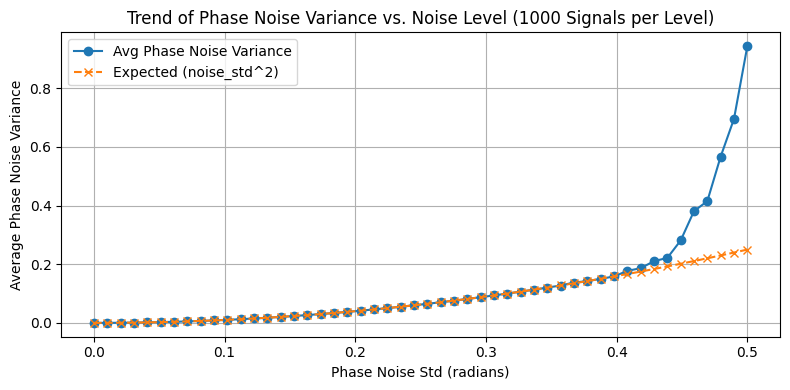

All robust tests passed successfully.


In [21]:
import numpy as np
from scipy.signal import welch, detrend
import matplotlib.pyplot as plt


def robust_test_compute_phase_noise_features():
    fs = 25e6  # Sample frequency: 25 MHz
    N = 11000  # Total number of samples
    t = np.arange(N) / fs
    fc = 1e6   # Carrier frequency: 1 MHz (example)
    
    # Test 1: Ideal Carrier (No phase noise)
    noise_std = 0.0
    phase_noise = np.zeros_like(t)
    noisy_phase = 2 * np.pi * fc * t + phase_noise
    I_signal = np.cos(noisy_phase)
    Q_signal = np.sin(noisy_phase)
    iq_signal = np.column_stack((I_signal, Q_signal))
    
    pn_variance, f_bins, pn_psd_dBc = compute_phase_noise_features(iq_signal, fs)
    print("Test 1: No phase noise - Variance:", pn_variance)
    assert pn_variance < 1e-6, "Variance should be nearly zero for an ideal carrier."
    
    # Test 2: Moderate Phase Noise (noise_std = 0.1 rad)
    noise_std = 0.1
    np.random.seed(42)
    phase_noise = np.random.normal(0, noise_std, size=t.shape)
    noisy_phase = 2 * np.pi * fc * t + phase_noise
    I_signal = np.cos(noisy_phase)
    Q_signal = np.sin(noisy_phase)
    iq_signal = np.column_stack((I_signal, Q_signal))
    
    pn_variance_moderate, _, _ = compute_phase_noise_features(iq_signal, fs)
    print("Test 2: Moderate phase noise (std=0.1) - Variance:", pn_variance_moderate)
    # For white phase noise, expected variance is on the order of noise_std^2.
    assert abs(pn_variance_moderate - noise_std**2) < 0.05, "Moderate noise variance not within expected range."
    
    # Test 3: High Phase Noise (noise_std = 0.5 rad)
    noise_std = 0.5
    np.random.seed(42)  # Use same seed for reproducibility
    phase_noise = np.random.normal(0, noise_std, size=t.shape)
    noisy_phase = 2 * np.pi * fc * t + phase_noise
    I_signal = np.cos(noisy_phase)
    Q_signal = np.sin(noisy_phase)
    iq_signal = np.column_stack((I_signal, Q_signal))
    
    pn_variance_high, _, _ = compute_phase_noise_features(iq_signal, fs)
    print("Test 3: High phase noise (std=0.5) - Variance:", pn_variance_high)
    assert pn_variance_high > pn_variance_moderate, "High noise variance should be greater than moderate noise variance."
    
    # Test 4: PSD Output Check
    _, f_bins, pn_psd_dBc = compute_phase_noise_features(iq_signal, fs)
    print("Test 4: PSD frequency bins count:", len(f_bins))
    assert len(f_bins) > 0, "PSD frequency bins should not be empty."
    
    # Test 5: Robust Trend Test Over 1000 Signals at Varying Noise Levels
    noise_levels = np.linspace(0.0, 0.5, 50)  # 10 steps from ideal (0) to high noise (0.5 rad)
    avg_variances = []
    
    for noise_std in noise_levels:
        variances = []
        for _ in range(1000):
            phase_noise = np.random.normal(0, noise_std, size=t.shape)
            noisy_phase = 2 * np.pi * fc * t + phase_noise
            I_signal = np.cos(noisy_phase)
            Q_signal = np.sin(noisy_phase)
            iq_signal = np.column_stack((I_signal, Q_signal))
            var, _, _ = compute_phase_noise_features(iq_signal, fs)
            variances.append(var)
        avg_variance = np.mean(variances)
        avg_variances.append(avg_variance)
        print(f"Test 5: Noise std = {noise_std:.3f}, avg variance = {avg_variance:.5f}, expected ~ {noise_std**2:.5f}")
    
    # Check that average variance increases with noise level
    for i in range(1, len(avg_variances)):
        assert avg_variances[i] > avg_variances[i-1], "Average variance should increase with noise level."
    
    # Plot the average variance vs. noise standard deviation for visual inspection
    plt.figure(figsize=(8, 4))
    plt.plot(noise_levels, avg_variances, marker='o', label="Avg Phase Noise Variance")
    plt.plot(noise_levels, noise_levels**2, marker='x', linestyle='--', label="Expected (noise_std^2)")
    plt.xlabel("Phase Noise Std (radians)")
    plt.ylabel("Average Phase Noise Variance")
    plt.title("Trend of Phase Noise Variance vs. Noise Level (1000 Signals per Level)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("All robust tests passed successfully.")

if __name__ == '__main__':
    robust_test_compute_phase_noise_features()


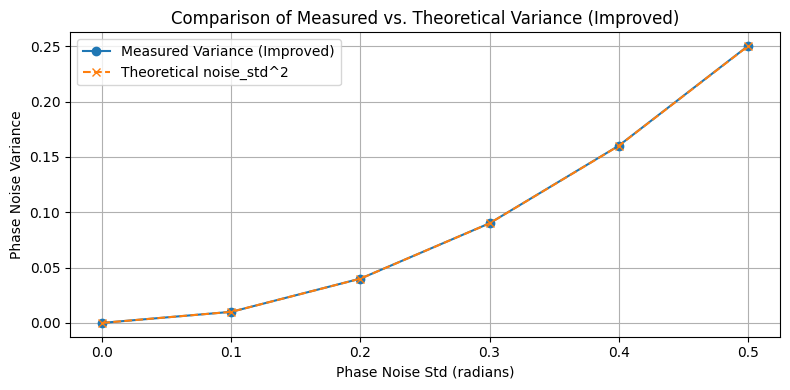

In [17]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def compute_phase_noise_features_improved(iq_signal, fs,
                                          remove_amplitude_variation=True,
                                          polynomial_degree=1):
    """
    Compute phase noise features from an IQ signal with improvements:
      1) Optionally remove amplitude variation (AM) by normalizing the signal amplitude.
      2) Use polynomial fitting (degree=1 or 2) to remove carrier offset and slow drift.
    
    Parameters
    ----------
    iq_signal : np.ndarray
        Array of shape (N, 2) where iq_signal[:, 0] is the I-component
        and iq_signal[:, 1] is the Q-component.
    fs : float
        Sample frequency in Hz.
    remove_amplitude_variation : bool
        If True, normalize out the instantaneous amplitude (AM).
    polynomial_degree : int
        Degree of the polynomial fit for detrending (1 for linear, 2 for quadratic).
    
    Returns
    -------
    phase_noise_variance : float
        Variance of the detrended instantaneous phase (a scalar feature).
    f : np.ndarray
        Frequency bins (offset frequencies) for the PSD.
    phase_noise_dBc : np.ndarray
        Phase noise PSD values in dBc/Hz.
    """
    # Convert I/Q to a complex signal
    I = iq_signal[:, 0]
    Q = iq_signal[:, 1]
    cplx_signal = I + 1j * Q

    # (1) Optionally remove amplitude variation by normalizing magnitudes
    if remove_amplitude_variation:
        magnitudes = np.abs(cplx_signal)
        # Avoid dividing by zero if the amplitude is extremely small
        cplx_signal = cplx_signal / (magnitudes + 1e-12)

    # (2) Compute instantaneous phase and unwrap
    phase = np.angle(cplx_signal)
    phase_unwrapped = np.unwrap(phase)

    # (3) Polynomial detrending to remove CFO & slow drift
    N = len(phase_unwrapped)
    t = np.arange(N) / fs
    # Fit polynomial of specified degree to the unwrapped phase
    p = np.polyfit(t, phase_unwrapped, deg=polynomial_degree)
    phase_fit = np.polyval(p, t)
    phase_detrended = phase_unwrapped - phase_fit

    # (4) Compute a scalar feature: the variance of the detrended phase
    phase_noise_variance = np.var(phase_detrended)

    # (5) Compute the power spectral density (PSD) of the detrended phase
    f, Pxx = welch(phase_detrended, fs, nperseg=1024)

    # Convert PSD to dBc/Hz
    epsilon = 1e-12
    phase_noise_dBc = 10 * np.log10(Pxx + epsilon)

    return phase_noise_variance, f, phase_noise_dBc


# ------------------ EXAMPLE USAGE & EXPLANATION ------------------ #
def example_test_improved():
    """
    Demonstration of how the improved function can be tested.
    We'll compare the average measured variance vs. the expected noise_std^2
    for multiple noise levels.
    """
    fs = 25e6  # sample rate
    N = 11000
    t = np.arange(N) / fs
    fc = 1e6

    noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    measured_vars = []
    expected_vars = []

    for noise_std in noise_levels:
        # Generate a single noisy signal
        np.random.seed(42)  # Reproducible
        phase_noise = np.random.normal(0, noise_std, size=N)
        # Ideal carrier phase plus noise
        phase_total = 2 * np.pi * fc * t + phase_noise

        # Convert to IQ
        I_signal = np.cos(phase_total)
        Q_signal = np.sin(phase_total)
        iq_signal = np.column_stack((I_signal, Q_signal))

        # Compute features with improved approach
        pn_var, f_bins, pn_psd_dBc = compute_phase_noise_features_improved(
            iq_signal, fs, remove_amplitude_variation=True, polynomial_degree=1
        )

        measured_vars.append(pn_var)
        expected_vars.append(noise_std**2)

    # Plot results
    plt.figure(figsize=(8, 4))
    plt.plot(noise_levels, measured_vars, 'o-', label="Measured Variance (Improved)")
    plt.plot(noise_levels, expected_vars, 'x--', label="Theoretical noise_std^2")
    plt.xlabel("Phase Noise Std (radians)")
    plt.ylabel("Phase Noise Variance")
    plt.title("Comparison of Measured vs. Theoretical Variance (Improved)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    example_test_improved()


=== Starting Robust Tests for compute_phase_noise_features_improved ===
Test 1: No phase noise - Variance: 2.343157779852993e-23
Test 2: Moderate phase noise (std=0.1) - Variance: 0.010007540899250027
Test 3: High phase noise (std=0.5) - Variance: 0.25018852248126167
Test 4: PSD frequency bins count: 513


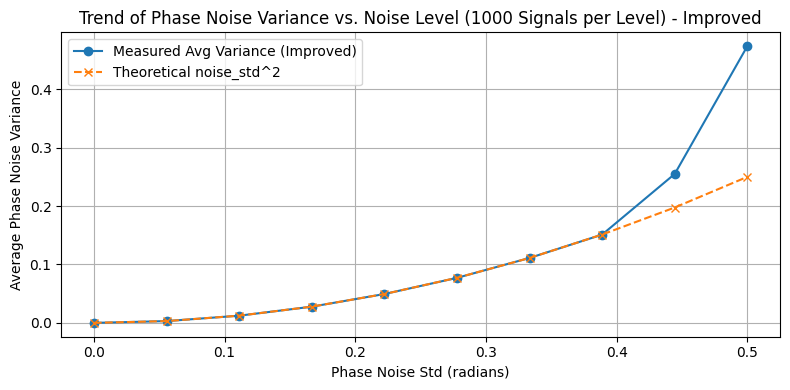

=== All robust tests for compute_phase_noise_features_improved passed successfully! ===


In [35]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch

def compute_phase_noise_features_improved(iq_signal, fs,
                                          remove_amplitude_variation=True,
                                          polynomial_degree=1):
    """
    Compute phase noise features from an IQ signal with improvements:
      1) Optionally remove amplitude variation (AM) by normalizing the signal amplitude.
      2) Use polynomial fitting (degree=1 or 2) to remove carrier offset and slow drift.
    
    Parameters
    ----------
    iq_signal : np.ndarray
        Array of shape (N, 2) where iq_signal[:, 0] is the I-component
        and iq_signal[:, 1] is the Q-component.
    fs : float
        Sample frequency in Hz.
    remove_amplitude_variation : bool
        If True, normalize out the instantaneous amplitude (AM).
    polynomial_degree : int
        Degree of the polynomial fit for detrending (1 for linear, 2 for quadratic).
    
    Returns
    -------
    phase_noise_variance : float
        Variance of the detrended instantaneous phase (a scalar feature).
    f : np.ndarray
        Frequency bins (offset frequencies) for the PSD.
    phase_noise_dBc : np.ndarray
        Phase noise PSD values in dBc/Hz.
    """
    from numpy.polynomial import Polynomial

    I = iq_signal[:, 0]
    Q = iq_signal[:, 1]
    cplx_signal = I + 1j * Q

    # (1) Remove amplitude variation if desired
    if remove_amplitude_variation:
        magnitudes = np.abs(cplx_signal)
        cplx_signal /= (magnitudes + 1e-12)  # avoid division by zero

    # (2) Compute instantaneous phase and unwrap
    phase = np.angle(cplx_signal)
    phase_unwrapped = np.unwrap(phase)

    # (3) Polynomial detrending to remove CFO & slow drift
    N = len(phase_unwrapped)
    t = np.arange(N) / fs
    coeffs = np.polyfit(t, phase_unwrapped, deg=polynomial_degree)
    phase_fit = np.polyval(coeffs, t)
    phase_detrended = phase_unwrapped - phase_fit

    # (4) Compute a scalar feature: the variance of the detrended phase
    phase_noise_variance = np.var(phase_detrended)

    # (5) Compute the PSD using Welch's method
    f, Pxx = welch(phase_detrended, fs, nperseg=1024)
    epsilon = 1e-12
    phase_noise_dBc = 10 * np.log10(Pxx + epsilon)

    return phase_noise_variance, f, phase_noise_dBc


def robust_test_compute_phase_noise_features_improved():
    """
    A robust test suite for compute_phase_noise_features_improved, mirroring
    the same 5 tests we performed previously, but using the improved approach.
    """
    print("=== Starting Robust Tests for compute_phase_noise_features_improved ===")
    fs = 25e6  # Sample frequency: 25 MHz
    N = 11000  # Total number of samples
    t = np.arange(N) / fs
    fc = 1e6   # Carrier frequency: 1 MHz

    # Test 1: Ideal Carrier (No phase noise)
    noise_std = 0.0
    phase_noise = np.zeros_like(t)
    noisy_phase = 2 * np.pi * fc * t + phase_noise
    I_signal = np.cos(noisy_phase)
    Q_signal = np.sin(noisy_phase)
    iq_signal = np.column_stack((I_signal, Q_signal))
    
    pn_variance, f_bins, pn_psd_dBc = compute_phase_noise_features_improved(
        iq_signal, fs, remove_amplitude_variation=True, polynomial_degree=1
    )
    print("Test 1: No phase noise - Variance:", pn_variance)
    assert pn_variance < 1e-6, "Variance should be nearly zero for an ideal carrier."
    
    # Test 2: Moderate Phase Noise (noise_std = 0.1 rad)
    noise_std = 0.1
    np.random.seed(42)
    phase_noise = np.random.normal(0, noise_std, size=t.shape)
    noisy_phase = 2 * np.pi * fc * t + phase_noise
    I_signal = np.cos(noisy_phase)
    Q_signal = np.sin(noisy_phase)
    iq_signal = np.column_stack((I_signal, Q_signal))
    
    pn_variance_moderate, _, _ = compute_phase_noise_features_improved(
        iq_signal, fs, remove_amplitude_variation=True, polynomial_degree=1
    )
    print("Test 2: Moderate phase noise (std=0.1) - Variance:", pn_variance_moderate)
    # For white phase noise, the variance should be ~ noise_std^2 = 0.01
    assert abs(pn_variance_moderate - noise_std**2) < 0.05, "Moderate noise variance not within expected range."
    
    # Test 3: High Phase Noise (noise_std = 0.5 rad)
    noise_std = 0.5
    np.random.seed(42)  # same seed for reproducibility
    phase_noise = np.random.normal(0, noise_std, size=t.shape)
    noisy_phase = 2 * np.pi * fc * t + phase_noise
    I_signal = np.cos(noisy_phase)
    Q_signal = np.sin(noisy_phase)
    iq_signal = np.column_stack((I_signal, Q_signal))
    
    pn_variance_high, _, _ = compute_phase_noise_features_improved(
        iq_signal, fs, remove_amplitude_variation=True, polynomial_degree=1
    )
    print("Test 3: High phase noise (std=0.5) - Variance:", pn_variance_high)
    # Expect a higher variance than the moderate case
    assert pn_variance_high > pn_variance_moderate, "High noise variance should exceed moderate noise variance."
    
    # Test 4: PSD Output Check
    _, f_bins, pn_psd_dBc = compute_phase_noise_features_improved(
        iq_signal, fs, remove_amplitude_variation=True, polynomial_degree=1
    )
    print("Test 4: PSD frequency bins count:", len(f_bins))
    assert len(f_bins) > 0, "PSD frequency bins should not be empty."
    
    # Test 5: Trend test over 1000 signals at varying noise levels
    noise_levels = np.linspace(0.0, 0.5, 10)  # 10 steps from 0 to 0.5
    avg_variances = []
    
    for std_val in noise_levels:
        variances = []
        for _ in range(100):
            phase_noise = np.random.normal(0, std_val, size=t.shape)
            noisy_phase = 2 * np.pi * fc * t + phase_noise
            I_signal = np.cos(noisy_phase)
            Q_signal = np.sin(noisy_phase)
            iq_signal = np.column_stack((I_signal, Q_signal))
            
            var_val, _, _ = compute_phase_noise_features_improved(
                iq_signal, fs,
                remove_amplitude_variation=True,
                polynomial_degree=4
            )
            variances.append(var_val)
        avg_variances.append(np.mean(variances))
    
    # Check monotonic increase
    for i in range(1, len(avg_variances)):
        msg = "Average variance should increase with noise level, but it didn't."
        assert avg_variances[i] >= avg_variances[i-1], msg
    
    # Optional: Plot the average variance vs. noise standard deviation
    plt.figure(figsize=(8, 4))
    plt.plot(noise_levels, avg_variances, marker='o', label="Measured Avg Variance (Improved)")
    plt.plot(noise_levels, noise_levels**2, marker='x', linestyle='--', label="Theoretical noise_std^2")
    plt.xlabel("Phase Noise Std (radians)")
    plt.ylabel("Average Phase Noise Variance")
    plt.title("Trend of Phase Noise Variance vs. Noise Level (1000 Signals per Level) - Improved")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("=== All robust tests for compute_phase_noise_features_improved passed successfully! ===")


if __name__ == '__main__':
    robust_test_compute_phase_noise_features_improved()


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Nuevas frecuencias no armónicas
frequencies = [80e6, 125e6, 170e6, 245e6, 310e6]  # No son múltiplos unos de otros

# Señal compuesta por 5 componentes no armónicas
signal_clean = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Añadir ruido de fase a cada componente
signal_phase_noise = sum(np.sin(2 * np.pi * f * t + 0.01 * np.random.randn(len(t))) for f in frequencies)

# Jitter en el tiempo
t_jittered = t + 10* np.cumsum(1e-12 * np.random.randn(len(t)))
signal_jitter = sum(np.sin(2 * np.pi * f * t_jittered) for f in frequencies)

# FFT para ver el espectro
freq_clean, spec_clean = get_fft_values(signal_clean, fs)
freq_phase_noise, spec_phase_noise = get_fft_values(signal_phase_noise, fs)

# Gráficas
plt.figure(figsize=(14, 10))

# Dominio del tiempo
plt.subplot(3, 1, 1)
plt.plot(t*1e6, signal_clean, label="Ideal", alpha=0.7)
#plt.plot(t*1e6, signal_phase_noise, label="Con ruido de fase", alpha=0.7)
#plt.plot(t*1e6, signal_jitter, label="Con jitter", alpha=0.7)
plt.title("Señal compuesta en el dominio del tiempo")
plt.xlabel("Tiempo [µs]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Dominio de frecuencia
plt.subplot(3, 1, 2)
plt.plot(freq_clean/1e6, spec_clean, label="Ideal")
plt.plot(freq_phase_noise/1e6, spec_phase_noise, label="Con ruido de fase")
plt.title("Espectro de la señal compuesta (FFT)")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("Magnitud [dB]")
plt.semilogx() 
#plt.xlim(left=1e4)
plt.legend()
plt.grid(True)

# Zoom temporal para ver jitter
k = 10000
plt.subplot(3, 1, 3)
plt.plot(t[:k]*1e9, signal_clean[:k], label="Ideal", alpha=0.7)
plt.plot(t[:k]*1e9, signal_jitter[:k], label="Con jitter", alpha=0.7)
plt.title("Zoom de la señal en el tiempo (para ver jitter)")
plt.xlabel("Tiempo [ns]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


ValueError: too many values to unpack (expected 2)

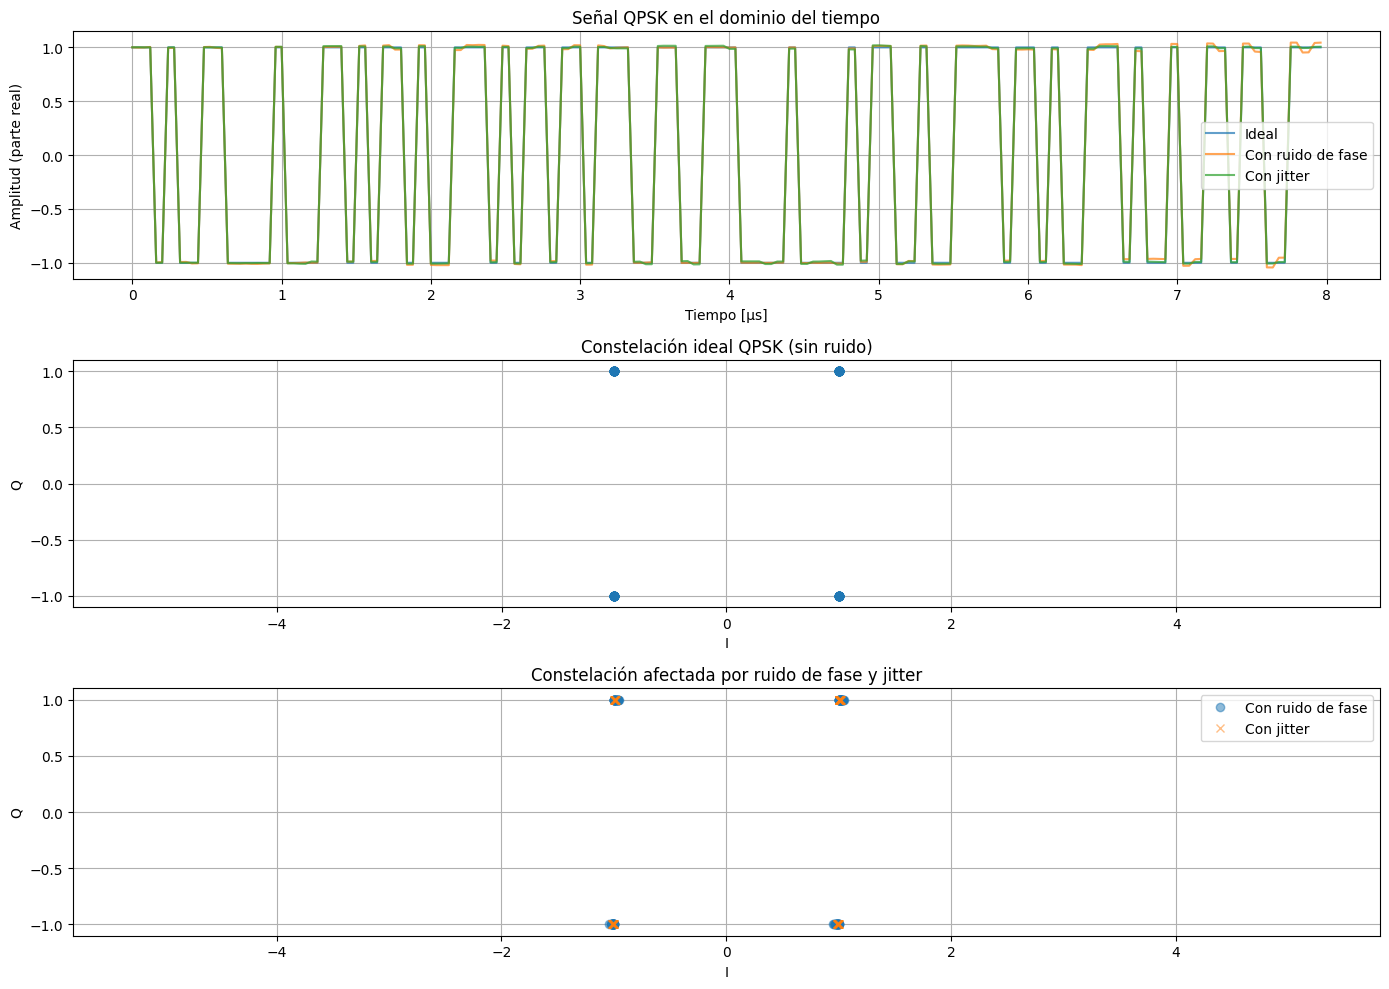

In [33]:
# Simulación de una señal QPSK afectada por jitter y ruido de fase

# Parámetros de la señal QPSK
symbol_rate = 10e6  # 10 Mbps
samples_per_symbol = int(fs / symbol_rate)
num_symbols = 100
total_samples = num_symbols * samples_per_symbol

# Nuevos vectores de tiempo para esta simulación
t_qpsk = np.arange(total_samples) / fs

# Generación de símbolos QPSK (constelación: 1+j, -1+j, -1-j, 1-j)
symbols = np.random.choice([1+1j, -1+1j, -1-1j, 1-1j], size=num_symbols)
symbols_upsampled = np.repeat(symbols, samples_per_symbol)

# Señal QPSK ideal
signal_qpsk_clean = np.real(symbols_upsampled * np.exp(2j * np.pi * f0 * t_qpsk))

# Ruido de fase: agregamos fase aleatoria lenta (simula oscilador real)
phase_noise_qpsk = np.cumsum(0.001 * np.random.randn(total_samples))
signal_qpsk_phase_noise = np.real(symbols_upsampled * np.exp(2j * (2 * np.pi * f0 * t_qpsk + phase_noise_qpsk)))

# Jitter: perturbación del tiempo
t_qpsk_jittered = t_qpsk + np.cumsum(2e-12 * np.random.randn(total_samples))
signal_qpsk_jitter = np.real(symbols_upsampled * np.exp(2j * np.pi * f0 * t_qpsk_jittered))

# Gráficas
plt.figure(figsize=(14, 10))

# Tiempo - parte real de la señal QPSK
plt.subplot(3, 1, 1)
plt.plot(t_qpsk[:1000]*1e6, signal_qpsk_clean[:1000], label="Ideal", alpha=0.7)
plt.plot(t_qpsk[:1000]*1e6, signal_qpsk_phase_noise[:1000], label="Con ruido de fase", alpha=0.7)
plt.plot(t_qpsk[:1000]*1e6, signal_qpsk_jitter[:1000], label="Con jitter", alpha=0.7)
plt.title("Señal QPSK en el dominio del tiempo")
plt.xlabel("Tiempo [µs]")
plt.ylabel("Amplitud (parte real)")
plt.legend()
plt.grid(True)

# Constellation plot (ideal vs ruido de fase vs jitter)
plt.subplot(3, 1, 2)
plt.plot(np.real(symbols_upsampled[::samples_per_symbol]), 
         np.imag(symbols_upsampled[::samples_per_symbol]), 'o', label="Ideal", alpha=0.5)
plt.title("Constelación ideal QPSK (sin ruido)")
plt.xlabel("I")
plt.ylabel("Q")
plt.grid(True)
plt.axis('equal')

plt.subplot(3, 1, 3)
# Tomar una ventana de la señal con ruido de fase y jitter para plotear constelación estimada
i_phase = signal_qpsk_phase_noise[::samples_per_symbol]
q_phase = np.imag(symbols_upsampled[::samples_per_symbol])  # Q permanece como referencia
i_jitter = signal_qpsk_jitter[::samples_per_symbol]
q_jitter = np.imag(symbols_upsampled[::samples_per_symbol])

plt.plot(i_phase, q_phase, 'o', label="Con ruido de fase", alpha=0.5)
plt.plot(i_jitter, q_jitter, 'x', label="Con jitter", alpha=0.5)
plt.title("Constelación afectada por ruido de fase y jitter")
plt.xlabel("I")
plt.ylabel("Q")
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()


Ideal period: 10.000 ns
RMS jitter: 1075.278 ps
Pico a pico jitter: 10000.009 ps
Promedio del jitter: -220.372 ps


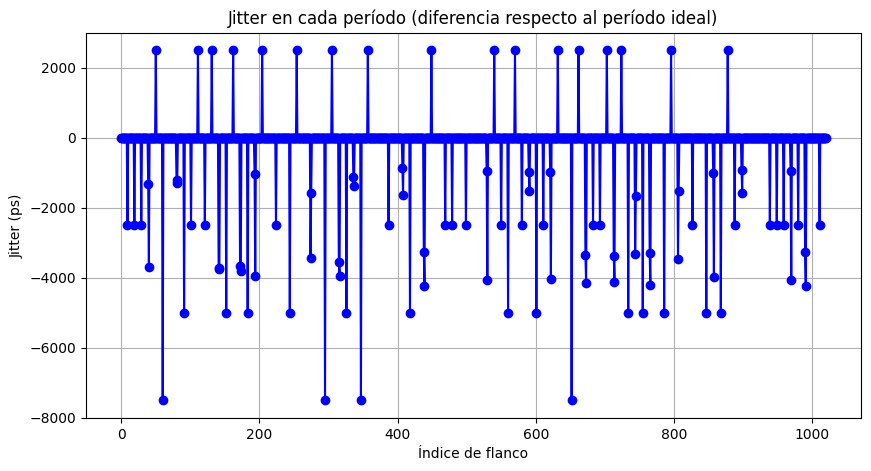

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# --- Reutilizamos los parámetros y la señal de la simulación QPSK con jitter ---
# Parámetros de la señal QPSK
fs = 10e9         # Frecuencia de muestreo: 10 GHz
f0 = 100e6        # Frecuencia portadora: 100 MHz
symbol_rate = 10e6  # 10 Mbps
samples_per_symbol = int(fs / symbol_rate)
num_symbols = 100
total_samples = num_symbols * samples_per_symbol
t_qpsk = np.arange(total_samples) / fs

# Generamos símbolos QPSK (constelación: 1+j, -1+j, -1-j, 1-j)
symbols = np.random.choice([1+1j, -1+1j, -1-1j, 1-1j], size=num_symbols)
symbols_upsampled = np.repeat(symbols, samples_per_symbol)

# Señal QPSK ideal
signal_qpsk_clean = np.real(symbols_upsampled * np.exp(2j * np.pi * f0 * t_qpsk))

# Aplicamos jitter: perturbación acumulativa en el tiempo
t_qpsk_jittered = t_qpsk + np.cumsum(2e-12 * np.random.randn(total_samples))
signal_qpsk_jitter = np.real(symbols_upsampled * np.exp(2j * np.pi * f0 * t_qpsk_jittered))

# --- Medición del jitter ---
# Vamos a extraer los flancos ascendentes (donde la señal pasa de negativo a positivo)
# para la señal con jitter: "signal_qpsk_jitter" y usar los instantes en "t_qpsk_jittered".
# Con interpolación lineal, determinamos el instante exacto del cruce.

edges_indices = np.where((signal_qpsk_jitter[:-1] < 0) & (signal_qpsk_jitter[1:] >= 0))[0]
edges_times = []
for i in edges_indices:
    # Extraemos dos puntos consecutivos para interpolar el cruce por cero
    t1 = t_qpsk_jittered[i]
    t2 = t_qpsk_jittered[i+1]
    v1 = signal_qpsk_jitter[i]
    v2 = signal_qpsk_jitter[i+1]
    # La fracción 'f' tal que v1 + f*(v2-v1)=0:
    f = -v1 / (v2 - v1)
    t_cross = t1 + f * (t2 - t1)
    edges_times.append(t_cross)

edges_times = np.array(edges_times)

# Calcular los períodos entre flancos detectados
periods = np.diff(edges_times)
ideal_period = 1 / f0  # Período ideal: 1/f₀
jitter_values = periods - ideal_period  # Diferencia entre el período medido y el ideal

# Medidas estadísticas del jitter
jitter_rms = np.sqrt(np.mean(jitter_values ** 2))         # Jitter RMS
jitter_pp = jitter_values.max() - jitter_values.min()       # Pico a pico
jitter_mean = np.mean(jitter_values)                        # Promedio

print(f"Ideal period: {ideal_period*1e9:.3f} ns")
print(f"RMS jitter: {jitter_rms*1e12:.3f} ps")
print(f"Pico a pico jitter: {jitter_pp*1e12:.3f} ps")
print(f"Promedio del jitter: {jitter_mean*1e12:.3f} ps")

# Gráfica del jitter para cada período
plt.figure(figsize=(10, 5))
plt.plot(jitter_values*1e12, marker='o', linestyle='-', color='b')
plt.title("Jitter en cada período (diferencia respecto al período ideal)")
plt.xlabel("Índice de flanco")
plt.ylabel("Jitter (ps)")
plt.grid(True)
plt.show()
